---
title: Classification
format: html
bibliography: project_reference.bib
---
## Introduction

Within this tab I will use a classification decision tree in order to classify certain tuples as sustainable or not.

This model aims to explore whether specific variables are good indicators of the extent to which policies relate to the ocean. The decision tree visualization allows us to see which features are most important in determining the sustainability category. This can provide valuable insights into what action countries are taking and how it has a impact on their sustainability level - which is being classified into the bins.

If the model performs well, the findings could have the ability inform data-driven decision-making in policy development specifically with regard to ocean sustainability and conservation efforts.

By understanding the variables that influence sustainability levels, conservation initiatives can be targeted and tailored to address specific challenges faced by countries.

## Decision Tree Classification

The decision tree algorithm works by recursively splitting the data based on the features (attributes) to create a tree-like structure. Each internal node of the tree represents a decision based on a particular feature, and each leaf node represents the class label (1,2,3,4,5). 1 being least sustainable and 5 being most sustainable. The final leaf node reached determines the predicted class for that tuple.

### Importing Libraries and Data

In [48]:
#| code-fold: true
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.tree import export_text


# Loading data
trees = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/nb_record.csv")


### Creating Bins 

I created five bins for my target variable. 

**Target** - Percentage of Policy out of all policy in a year relating to ocean sustainability. I binned these values into five bins. These bins are 0-17, 18-36, 37-54, 55 - 72, 73 - 87. For example, Bin 1 includes countries that have 0-17% of policy relating to ocean sustainability each year, bin 2 is 18-36% of policy relating to sustainability, etc.  

The new column Binned_Value was added to use as the target variable.

In [44]:
#| code-fold: true

# Create bins for values to be placed in 1, 2, 3, 4, 5
y = trees['Value']
bin_edges = [0, 18, 36, 54, 72, 87]
y_binned = pd.cut(y, bins=bin_edges, labels=False, include_lowest=True)
trees['Binned_Value'] = y_binned + 1
trees.head()


,Aqua Production (Millions),Marine Protected Area (sqkm),Inventions (number),Instruments (number),Fishing Exports (Millions),Value,Country,Year,Binned_Value
0,376896.50,485.10,12.00,5.0,1963.38,10.64,Australia,2000,1
1,55.25,5.65,0.33,0.0,739.13,0.00,Belgium,2000,1
2,24661.75,605.08,23.33,8.0,4431.00,5.23,Canada,2000,1
3,8849.75,2124.58,1.00,4.0,3118.12,19.05,Chile,2000,2
4,29421.75,235.18,0.00,0.0,321.71,0.00,Colombia,2000,1


### Class Distribution

This decision tree algorithm may be biased towards the majority class (bin 1), leading to lower accuracy for minority classes. You can see the class distribution results below.

Class Distribution:
Binned_Value
1    411
2     44
5     34
3     14
4     13
Name: count, dtype: int64


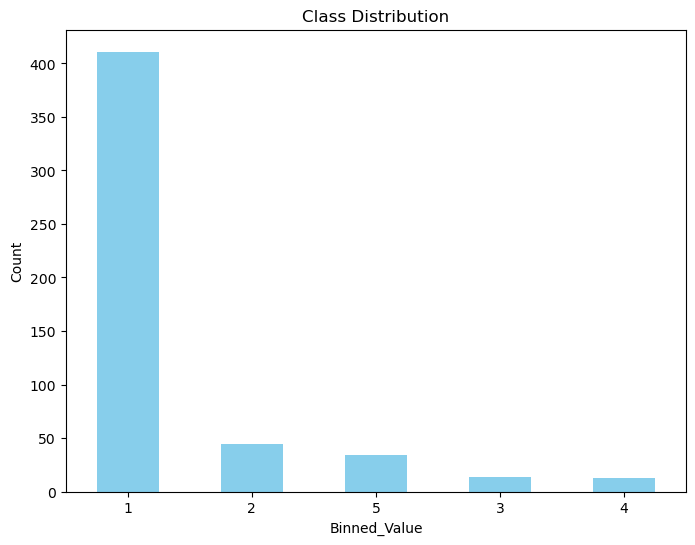

In [45]:
#| code-fold: true
class_distribution = trees['Binned_Value'].value_counts()
print("Class Distribution:")
print(class_distribution)
class_distribution.plot(kind='bar', rot=0, color='skyblue', figsize=(8, 6))
plt.title('Class Distribution')
plt.xlabel('Binned_Value')
plt.ylabel('Count')
plt.show()

### Baseline Comparison

This baseline comparison can be used to act as a simple benchmark that helps us understand how well the decision tree models are performing and whether the chosen metrics are appropriate for your problem. If the decision tree model below cannot outperform this simple random prediction... there might be issues with the models or data.

In [47]:
#| code-fold: true

from collections import Counter
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# Random Classifier function
def random_classifier(y_data):
    num_classes = len(np.unique(y_data))
    ypred = np.random.randint(1, num_classes + 1, size=len(y_data))  # Random predictions for Binned_Value classes
    
    print("-----RANDOM CLASSIFIER-----")
    print("Count of Predictions:", Counter(ypred).values())
    print("Probability of Predictions:", np.fromiter(Counter(ypred).values(), dtype=float) / len(y_data))
    
    accuracy = accuracy_score(y_data, ypred)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_data, ypred, average=None)
    
    print("Accuracy:", accuracy)
    print("Precision (Class 1, Class 2, Class 3, Class 4, Class 5):", precision)
    print("Recall (Class 1, Class 2, Class 3, Class 4, Class 5):", recall)
    print("F1-score (Class 1, Class 2, Class 3, Class 4, Class 5):", fscore)


y = trees['Binned_Value']
random_classifier(y)


-----RANDOM CLASSIFIER-----
Count of Predictions: dict_values([112, 100, 116, 97, 91])
Probability of Predictions: [0.21705426 0.19379845 0.2248062  0.1879845  0.17635659]
Accuracy: 0.17829457364341086
Precision (Class 1, Class 2, Class 3, Class 4, Class 5): [0.78021978 0.08247423 0.03       0.01724138 0.07142857]
Recall (Class 1, Class 2, Class 3, Class 4, Class 5): [0.17274939 0.18181818 0.21428571 0.15384615 0.23529412]
F1-score (Class 1, Class 2, Class 3, Class 4, Class 5): [0.28286853 0.11347518 0.05263158 0.03100775 0.10958904]


### Decision Tree Classifier

Using DecisionTreeClassifier from sklearn.tree we can implement a decision tree. 

In [35]:
#| code-fold: true

# X = ALL FEATURES BESIDES value, binned_value and country
X = trees.drop(['Value', 'Binned_Value', 'Country'], axis = 1)

# Target variable is BINS (classifying data into these bins)
y = trees['Binned_Value']

# Split dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Decision Tree classifier
clf = DecisionTreeClassifier(criterion="entropy")

# Training Classifier
clf = clf.fit(X_train, y_train)

# Predicting response for dataset
y_pred = clf.predict(X_test)

### Evaluating Performance

After implementing the decision tree, the accuracy score tells us that this model is 91% accurate. Furthermore, the precision, recall and f-1 scores are all very high as well. 

In [36]:
#| code-fold: true

# Accuracy using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9161290322580645
Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.95      0.96       128
           2       0.40      0.50      0.44         8
           3       0.67      0.67      0.67         3
           4       0.67      0.67      0.67         3
           5       1.00      0.92      0.96        13

    accuracy                           0.92       155
   macro avg       0.74      0.74      0.74       155
weighted avg       0.92      0.92      0.92       155



**Accuracy on the TRAINING vs TESTING set**

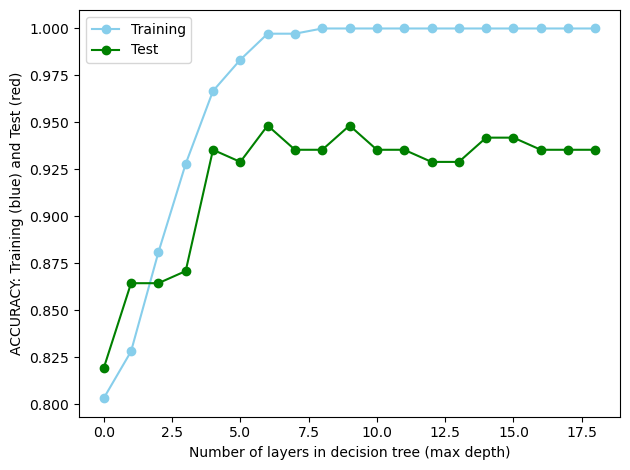

In [22]:
#| code-fold: true

# Code given in 5000 resources
test_results = []
train_results = []

for num_layer in range(1, 20):
    model = DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(X_train, y_train)

    yp_train = model.predict(X_train)
    yp_test = model.predict(X_test)

    test_results.append([num_layer, accuracy_score(y_test, yp_test), recall_score(y_test, yp_test, average='weighted')])
    train_results.append([num_layer, accuracy_score(y_train, yp_train), recall_score(y_train, yp_train, average='weighted')])

plt.plot([column[1] for column in train_results], marker='o', color="skyblue", label="Training")
plt.plot([column[1] for column in test_results], marker='o', color="green", label="Test")
plt.ylabel("ACCURACY: Training (blue) and Test (green)")
plt.xlabel("Lyers in Decision Tree (max depth)")
plt.legend()
plt.tight_layout()
plt.show()

### Confusion Matrices

Confusion Matrices help evaluate the performance of a classification model by comparing its predictions to the actual ground truth.

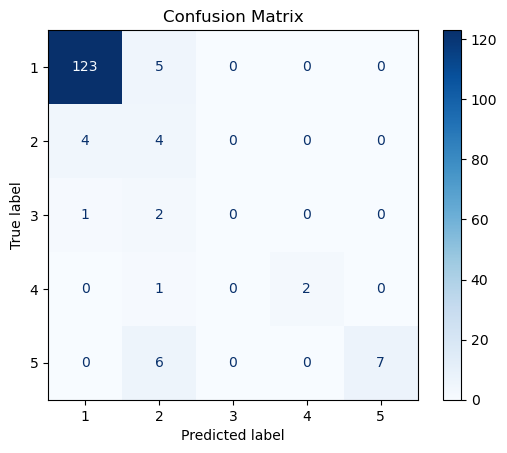

ACCURACY: 0.8774193548387097
NEGATIVE RECALL (Y=0): 0.9609375
NEGATIVE PRECISION (Y=0): 0.9609375
POSITIVE RECALL (Y=1): 0.5
POSITIVE PRECISION (Y=1): 0.2222222222222222
[[123   5   0   0   0]
 [  4   4   0   0   0]
 [  1   2   0   0   0]
 [  0   1   0   2   0]
 [  0   6   0   0   7]]


In [58]:
#| code-fold: true

def confusion_plot(y_actual, y_pred):

    accuracy = accuracy_score(y_actual, y_pred)
    n_recall = recall_score(y_actual, y_pred, average=None, zero_division=1)[0]
    n_precision = precision_score(y_actual, y_pred, average=None, zero_division=1)[0]
    p_recall = recall_score(y_actual, y_pred, average=None, zero_division=1)[1]
    p_precision = precision_score(y_actual, y_pred, average=None, zero_division=1)[1]
    
    unique_labels = np.unique(np.concatenate([y_actual, y_pred]))
    cm = confusion_matrix(y_actual, y_pred, labels=unique_labels)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    disp.plot(cmap='Blues', values_format='d')

    plt.title('Confusion Matrix')
    plt.show()
    
    print("ACCURACY:", accuracy)
    print("NEGATIVE RECALL (Y=0):", n_recall)
    print("NEGATIVE PRECISION (Y=0):", n_precision)
    print("POSITIVE RECALL (Y=1):", p_recall)
    print("POSITIVE PRECISION (Y=1):", p_precision)
    print(cm)

confusion_plot(y_test, y_pred)


As you can see from this confusion matrix, the model did a good job predicting Bin 1 and Bin 2. 

### Plotting Tree

Below I have plotted the tree with a max depth of 3. I chose this max depth after looking at the training vs testing accuracy plot. 

I also printed out the text for how this decision tree is working. 

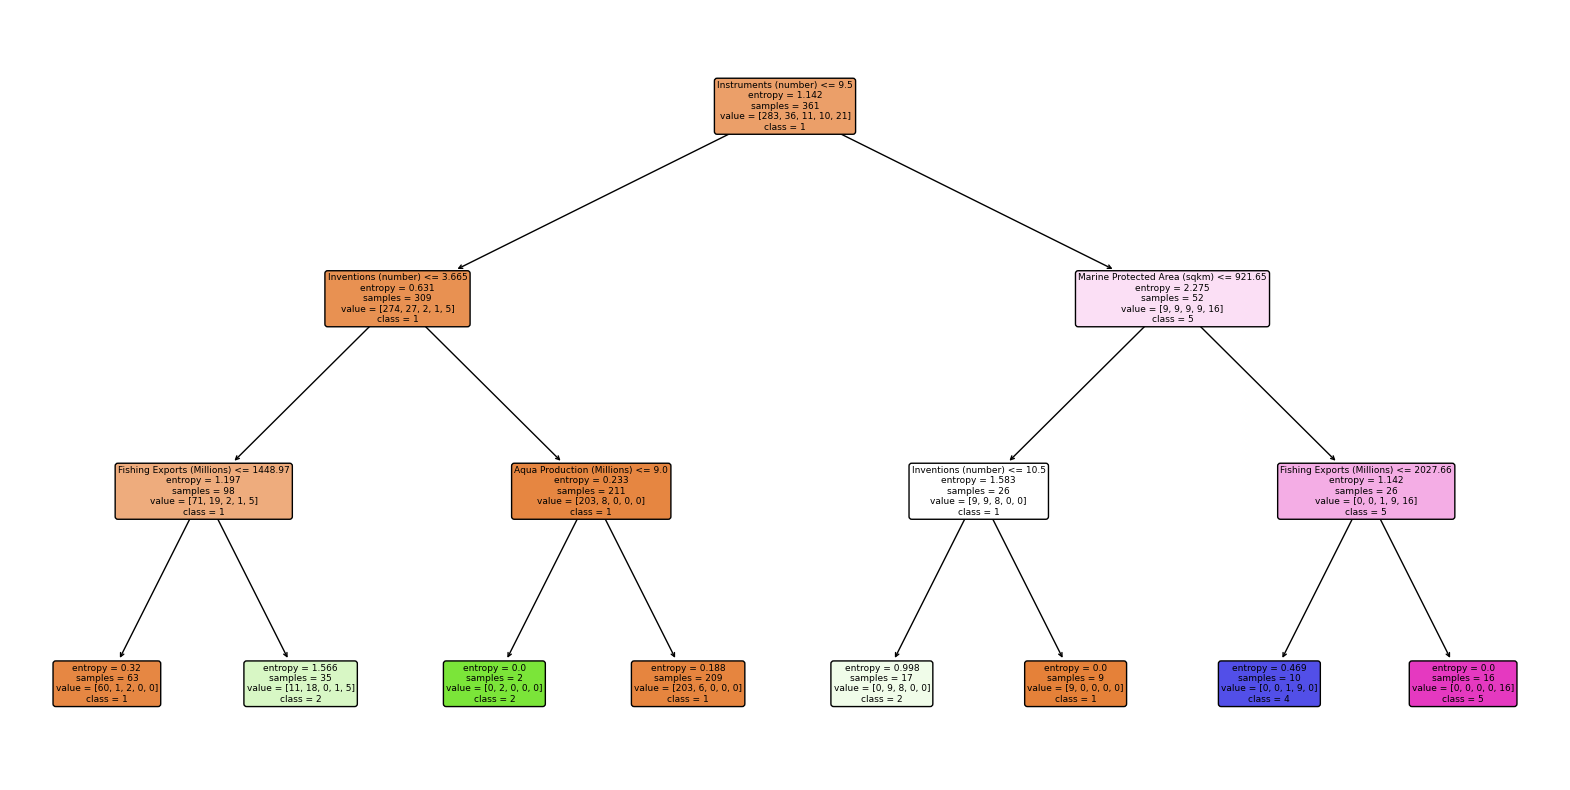

In [50]:
#| code-fold: true

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=[str(label) for label in sorted(y.unique())], filled=True, rounded=True)
plt.show()

In [52]:
#| code-fold: true
tree_summary = export_text(model, feature_names=X_train.columns.tolist(), decimals=3)
print(tree_summary)


|--- Instruments (number) <= 9.500
|   |--- Inventions (number) <= 2.350
|   |   |--- Fishing Exports (Millions) <= 1486.940
|   |   |   |--- Instruments (number) <= 4.500
|   |   |   |   |--- Year <= 2002.500
|   |   |   |   |   |--- Aqua Production (Millions) <= 35545.000
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Aqua Production (Millions) >  35545.000
|   |   |   |   |   |   |--- Aqua Production (Millions) <= 39355.750
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- Aqua Production (Millions) >  39355.750
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Year >  2002.500
|   |   |   |   |   |--- class: 1
|   |   |   |--- Instruments (number) >  4.500
|   |   |   |   |--- Aqua Production (Millions) <= 4776.875
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- Aqua Production (Millions) >  4776.875
|   |   |   |   |   |--- class: 1
|   |   |--- Fishing Exports (Millions) >  1486.940
|   |   |   |--- Aqua Production (Million

Explaining this DECISION TREE

**Root Node:**

- Instruments (number) <= 9.500, is the starting point for the decision-making process. This condition splits the data into two branches based on whether this condition is true or false.

**First Level:**

- If Instruments (number) <= 9.500 is true, it further checks Inventions (number) <= 2.350. If false, it follows the opposite branch.

**Second Level:**

- If Instruments (number) <= 9.500 and Inventions (number) <= 2.350 are both true, it checks Fishing Exports (Millions) <= 1486.940.

**Third Level:**

- The tree continues to branch based on various conditions, etc

**Leaf Nodes:**

- The leaf nodes provide the classification outcome based on the conditions met along the path from the root node to that leaf.

**Class Labels:**

- Each leaf node has a class label (1, 2, 3, 4, 5) indicating the predicted class for the given set of conditions!!!!

## Random Forests 

Additionally, I completed random forests on my data. Random forests are a collection of decision trees. Decision trees are the building blocks or random forests. 

Random forests have three main hyperparameters, which need to be set before training. These include node size, the number of trees, and the number of features sampled. After setting these hyperparamters, the random forest classifier can be used to solve for regression or classification problems.

To learn more about random forests visit [here](https://www.ibm.com/topics/random-forest)


In [53]:
#| code-fold: true

from sklearn.ensemble import RandomForestClassifier

# Specifying hyperparameters 
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    criterion="entropy",
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=None,
    random_state=1
)

# Train Random Forest Classifier
rf_classifier.fit(X_train, y_train)
y_rf_pred = rf_classifier.predict(X_test)

# Evaluation
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
rf_classification_rep = classification_report(y_test, y_rf_pred)
print("Random Forest Classification Report:\n", rf_classification_rep)


Random Forest Accuracy: 0.967741935483871
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       128
           2       0.83      0.62      0.71         8
           3       1.00      0.67      0.80         3
           4       1.00      0.67      0.80         3
           5       0.93      1.00      0.96        13

    accuracy                           0.97       155
   macro avg       0.95      0.79      0.85       155
weighted avg       0.97      0.97      0.96       155



### Random Forest Confusion Matrix

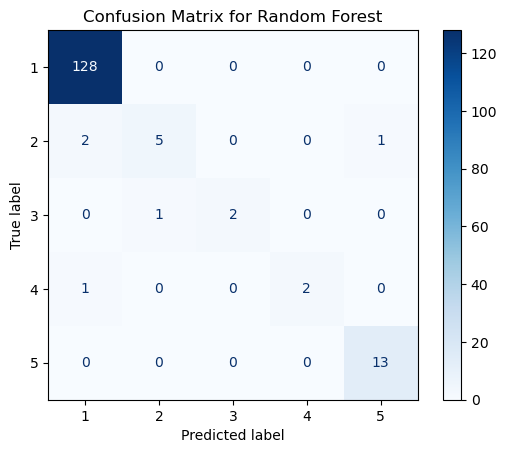

In [54]:
#| code-fold: true

rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix, display_labels=sorted(y.unique()))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()


Once again, this model does a very good job predicting Bin 1. This is a result of bin 1 having the highest number of tuples within the dataset. 

## Results and Conclusions

Overall the decision tree and random forest models have very high accuracy. Although, this may be due to the large number of countries that fall within Bin 1 - as shown by the class distribution. 

Decision trees are a very intuitive machine learning model. This model allows readers to see what attributes are taken into account when classifying a tuple as sustainable. 

A few interesting things to point out:

- The top most condition is based off of Policy Instruments. Policy Instruments are the amount of policy that has been released per year relating to sustainability (not just ocean sustainabiloty) by country. 
- The random forest algorithm preformed better than the classification decision tree!
